In [1]:
!pip install chardet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 5.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt
import chardet

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import TensorDataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

import math
import re

from sklearn.metrics import confusion_matrix
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Folder paths
benign_folder = "/kaggle/input/malwaredataset/Benign/Benign"
malicious_folder = "/kaggle/input/malwaredataset/Malware/Malware"

In [4]:
# Load benign data
benign_files = os.listdir(benign_folder)
benign_data = pd.concat([pd.read_csv(os.path.join(benign_folder, file), usecols=[ "Time", "Source", "Destination", "Protocol", "Length","Info"]) for file in benign_files])

# Load malicious data
malicious_files = os.listdir(malicious_folder)
malicious_data = pd.DataFrame()


In [5]:
for file in malicious_files:
    filepath = os.path.join(malicious_folder, file)
    encoding = 'utf-8'  # Default encoding

    try:
        # Try reading the file with utf-8 encoding
        malicious_data = pd.concat([malicious_data, pd.read_csv(filepath, encoding=encoding, usecols=[ "Time", "Source", "Destination", "Protocol", "Length","Info"])])
    except UnicodeDecodeError:
        # If utf-8 decoding fails, try detecting the encoding
        with open(filepath, 'rb') as f:
            result = chardet.detect(f.read())
        encoding = result['encoding']

        # Read CSV with detected encoding
        malicious_data = pd.concat([malicious_data, pd.read_csv(filepath, encoding=encoding, usecols=[ "Time", "Source", "Destination", "Protocol", "Length","Info"])])


In [6]:
# Display the first few rows of the benign data
print("Benign Data:")
benign_data.head()

Benign Data:


,Time,Source,Destination,Protocol,Length,Info
0,0.000000,1.2.136.22,1.1.183.138,TCP,1518,"80 > 16595 [PSH, ACK] Seq=1 Ack=1 Win=8688 L..."
1,0.000001,1.2.87.33,1.1.148.63,TCP,1518,80 > 23514 [ACK] Seq=1 Ack=1 Win=8688 Len=14...
2,0.000002,1.2.60.197,1.1.188.148,TCP,1518,"80 > 16776 [PSH, ACK] Seq=1 Ack=1 Win=8688 L..."
3,0.000004,1.2.65.246,1.1.184.84,TCP,1518,"80 > 64176 [PSH, ACK] Seq=1 Ack=1 Win=8688 L..."
4,0.000005,1.2.232.162,1.1.147.81,TCP,1518,"80 > 24932 [PSH, ACK] Seq=1 Ack=1 Win=8688 L..."


In [7]:
# Display the first few rows of the malicious data
print("Malicious Data:")
malicious_data.head()

Malicious Data:


,Time,Source,Destination,Protocol,Length,Info
0,0.000000,Cisco_db:19:c3,Broadcast,ARP,60,Who has 147.32.84.165? Tell 147.32.84.1
1,2.027380,Cisco_db:19:c3,Broadcast,ARP,60,Who has 147.32.84.165? Tell 147.32.84.1
2,5.228178,Cisco_db:19:c3,Broadcast,ARP,60,Who has 147.32.84.165? Tell 147.32.84.1
3,9.665258,Cisco_db:19:c3,Broadcast,ARP,60,Who has 147.32.84.165? Tell 147.32.84.1
4,11.819503,Cisco_db:19:c3,Broadcast,ARP,60,Who has 147.32.84.165? Tell 147.32.84.1


In [8]:
malicious_data.shape

(1477536, 6)

In [9]:
benign_data.shape

(1380558, 6)

In [10]:
# Removing rows with ARP and DHCP protocol from benign dataset
benign_data = benign_data[(benign_data['Protocol'] != 'ARP') & (benign_data['Protocol'] != 'DHCP')]

# Removing rows with ARP and DHCP protocol from malicious dataset
malicious_data = malicious_data[(malicious_data['Protocol'] != 'ARP') & (malicious_data['Protocol'] != 'DHCP')]

In [11]:
# Display the first few rows of the benign data
print("Benign Data:")
benign_data.head()

Benign Data:


,Time,Source,Destination,Protocol,Length,Info
0,0.000000,1.2.136.22,1.1.183.138,TCP,1518,"80 > 16595 [PSH, ACK] Seq=1 Ack=1 Win=8688 L..."
1,0.000001,1.2.87.33,1.1.148.63,TCP,1518,80 > 23514 [ACK] Seq=1 Ack=1 Win=8688 Len=14...
2,0.000002,1.2.60.197,1.1.188.148,TCP,1518,"80 > 16776 [PSH, ACK] Seq=1 Ack=1 Win=8688 L..."
3,0.000004,1.2.65.246,1.1.184.84,TCP,1518,"80 > 64176 [PSH, ACK] Seq=1 Ack=1 Win=8688 L..."
4,0.000005,1.2.232.162,1.1.147.81,TCP,1518,"80 > 24932 [PSH, ACK] Seq=1 Ack=1 Win=8688 L..."


In [12]:
# Display the first few rows of the benign data
print("Benign Data:")
benign_data.head()

Benign Data:


,Time,Source,Destination,Protocol,Length,Info
0,0.000000,1.2.136.22,1.1.183.138,TCP,1518,"80 > 16595 [PSH, ACK] Seq=1 Ack=1 Win=8688 L..."
1,0.000001,1.2.87.33,1.1.148.63,TCP,1518,80 > 23514 [ACK] Seq=1 Ack=1 Win=8688 Len=14...
2,0.000002,1.2.60.197,1.1.188.148,TCP,1518,"80 > 16776 [PSH, ACK] Seq=1 Ack=1 Win=8688 L..."
3,0.000004,1.2.65.246,1.1.184.84,TCP,1518,"80 > 64176 [PSH, ACK] Seq=1 Ack=1 Win=8688 L..."
4,0.000005,1.2.232.162,1.1.147.81,TCP,1518,"80 > 24932 [PSH, ACK] Seq=1 Ack=1 Win=8688 L..."


In [ ]:
# Add a 'Class' column to each DataFrame
benign_data['Class'] = 0
malicious_data['Class'] = 1

# Concatenate the DataFrames
combined_data = pd.concat([benign_data, malicious_data], ignore_index=True)

In [14]:
combined_data.shape

(2803804, 7)

In [15]:
combined_data.head()

,Time,Source,Destination,Protocol,Length,Info,Class
0,0.000000,1.2.136.22,1.1.183.138,TCP,1518,"80 > 16595 [PSH, ACK] Seq=1 Ack=1 Win=8688 L...",1
1,0.000001,1.2.87.33,1.1.148.63,TCP,1518,80 > 23514 [ACK] Seq=1 Ack=1 Win=8688 Len=14...,1
2,0.000002,1.2.60.197,1.1.188.148,TCP,1518,"80 > 16776 [PSH, ACK] Seq=1 Ack=1 Win=8688 L...",1
3,0.000004,1.2.65.246,1.1.184.84,TCP,1518,"80 > 64176 [PSH, ACK] Seq=1 Ack=1 Win=8688 L...",1
4,0.000005,1.2.232.162,1.1.147.81,TCP,1518,"80 > 24932 [PSH, ACK] Seq=1 Ack=1 Win=8688 L...",1


In [16]:
class_counts = combined_data['Class'].value_counts()
class_0_count = class_counts[0]
class_1_count = class_counts[1]


In [ ]:
class_1_count

1423246

In [ ]:
class_0_count

1380558

In [19]:
# Check for missing values in the combined_data DataFrame
missing_values = combined_data.isnull().sum()
print(missing_values)

#Alternatively, to get a percentage of missing values
missing_percentage = (combined_data.isnull().sum() / len(combined_data)) * 100
missing_percentage

Time            0
Source          5
Destination     5
Protocol        0
Length          0
Info           46
Class           0
dtype: int64


Time           0.000000
Source         0.000178
Destination    0.000178
Protocol       0.000000
Length         0.000000
Info           0.001641
Class          0.000000
dtype: float64

In [20]:
# Drop rows with any missing values
combined_data = combined_data.dropna()

# Verify if there are any missing values left
missing_values_after_drop = combined_data.isnull().sum()
print(missing_values_after_drop)

#Alternatively, to get a percentage of missing values after dropping
missing_percentage_after_drop = (combined_data.isnull().sum() / len(combined_data)) * 100
missing_percentage_after_drop

Time           0
Source         0
Destination    0
Protocol       0
Length         0
Info           0
Class          0
dtype: int64


Time           0.0
Source         0.0
Destination    0.0
Protocol       0.0
Length         0.0
Info           0.0
Class          0.0
dtype: float64

# Transformer Applying

In [21]:
# Convert "Info" column to a list of strings
info_texts = combined_data["Info"].tolist()

In [22]:
import math
import re
# Calculate the number of rows for the random half
random_half_size = math.ceil(len(combined_data) / 100)

# Randomly select a half from the DataFrame
random_half_data = combined_data.sample(n=random_half_size, random_state=42)

# Preprocess the "Info" column
preprocessed_texts = random_half_data["Info"].astype(str).apply(lambda x: re.sub(r"[^\w\s]", "", x).lower().strip())

# Convert preprocessed texts to a list of strings
info_texts = preprocessed_texts.tolist()

In [23]:
random_half_data.shape

(28038, 7)

In [24]:
class_counts_new = random_half_data['Class'].value_counts()
class_0_count_new = class_counts_new[0]
class_1_count_new = class_counts_new[1]


In [25]:
class_0_count_new

14277

In [26]:
class_1_count_new

13761

In [27]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize text and convert labels to numerical values
inputs = tokenizer.batch_encode_plus(
    info_texts,
    padding=True,
    truncation=True,
    return_tensors="pt"
)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [28]:
input_ids = inputs["input_ids"]
attention_mask = inputs["attention_mask"]
labels = LabelEncoder().fit_transform(random_half_data["Class"])

# Step 6: Train/Test Split
train_inputs, test_inputs, train_labels, test_labels = train_test_split(
    input_ids, labels, test_size=0.3, random_state=42
)
train_masks, test_masks, _, _ = train_test_split(
    attention_mask, input_ids, test_size=0.3, random_state=42
)

# Convert inputs, masks, and labels into PyTorch tensors
train_inputs = torch.tensor(train_inputs)
train_labels = torch.tensor(train_labels)
train_masks = torch.tensor(train_masks)
test_inputs = torch.tensor(test_inputs)
test_labels = torch.tensor(test_labels)
test_masks = torch.tensor(test_masks)

# Create DataLoader for batch processing
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_dataloader = DataLoader(train_data, batch_size=16, shuffle=True)
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_dataloader = DataLoader(test_data, batch_size=16, shuffle=False)

# Step 7: Model Training
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
optimizer = AdamW(model.parameters(), lr=2e-5)


/tmp/ipykernel_22/798585738.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_inputs = torch.tensor(train_inputs)
/tmp/ipykernel_22/798585738.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_masks = torch.tensor(train_masks)
/tmp/ipykernel_22/798585738.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_inputs = torch.tensor(test_inputs)
/tmp/ipykernel_22/798585738.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_g

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [29]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


print(device)
epochs = 30
train_loss_values = []
test_accuracy_values = []
train_accuracy_values=[]

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_dataloader:
        batch_inputs, batch_masks, batch_labels = tuple(t.to(device) for t in batch)

        optimizer.zero_grad()

        outputs = model(
            input_ids=batch_inputs,
            attention_mask=batch_masks,
            labels=batch_labels
        )

        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    average_loss = total_loss / len(train_dataloader)
    train_loss_values.append(average_loss)

    print(f"Epoch: {epoch+1}, Average Loss: {average_loss}")

    # Calculate training accuracy
    model.eval()
    train_predictions = []
    train_true_labels = []
    with torch.no_grad():
        for batch in train_dataloader:
            batch_inputs, batch_masks, batch_labels = tuple(t.to(device) for t in batch)

            outputs = model(
                input_ids=batch_inputs,
                attention_mask=batch_masks
            )
            _, predicted_labels = torch.max(outputs.logits, dim=1)

            train_predictions.extend(predicted_labels.tolist())
            train_true_labels.extend(batch_labels.tolist())

        train_accuracy = (torch.tensor(train_predictions) == torch.tensor(train_true_labels)).sum().item() / len(train_true_labels)
        train_accuracy_values.append(train_accuracy)
        print(f"Training Accuracy: {train_accuracy}")

    # Calculate testing accuracy
    test_predictions = []
    test_true_labels = []
    with torch.no_grad():
        for batch in test_dataloader:
            batch_inputs, batch_masks, batch_labels = tuple(t.to(device) for t in batch)

            outputs = model(
                input_ids=batch_inputs,
                attention_mask=batch_masks
            )
            _, predicted_labels = torch.max(outputs.logits, dim=1)

            test_predictions.extend(predicted_labels.tolist())
            test_true_labels.extend(batch_labels.tolist())

        test_predictions = torch.tensor(test_predictions)
        test_true_labels = torch.tensor(test_true_labels)
        test_accuracy = (test_predictions == test_true_labels).sum().item() / len(test_true_labels)
        test_accuracy_values.append(test_accuracy)
        print(f"Testing Accuracy: {test_accuracy}")

cuda
Epoch: 1, Average Loss: 0.037423373575087696
Training Accuracy: 0.9910832569041068
Testing Accuracy: 0.9885877318116976
Epoch: 2, Average Loss: 0.015167286699440211
Training Accuracy: 0.9910832569041068
Testing Accuracy: 0.9885877318116976
Epoch: 3, Average Loss: 0.015528937054492096
Training Accuracy: 0.9900132477325996
Testing Accuracy: 0.990489776509748
Epoch: 4, Average Loss: 0.021205108655307836
Training Accuracy: 0.991592785081015
Testing Accuracy: 0.9933428435568236
Epoch: 5, Average Loss: 0.0167794929027584
Training Accuracy: 0.9899622949149088
Testing Accuracy: 0.9906086543033761
Epoch: 6, Average Loss: 0.016963193584079227
Training Accuracy: 0.9891470498318558
Testing Accuracy: 0.9875178316690443
Epoch: 7, Average Loss: 0.016833529774242
Training Accuracy: 0.9907265871802711
Testing Accuracy: 0.9916785544460295
Epoch: 8, Average Loss: 0.01405712836198381
Training Accuracy: 0.9916946907163966
Testing Accuracy: 0.9931050879695673
Epoch: 9, Average Loss: 0.01588369388727229

In [30]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

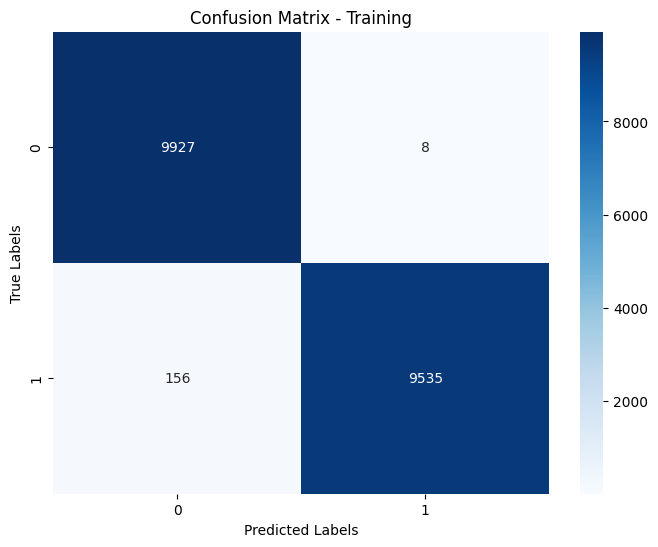

In [31]:
#
train_cm = confusion_matrix(train_true_labels, train_predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Training")
plt.show()

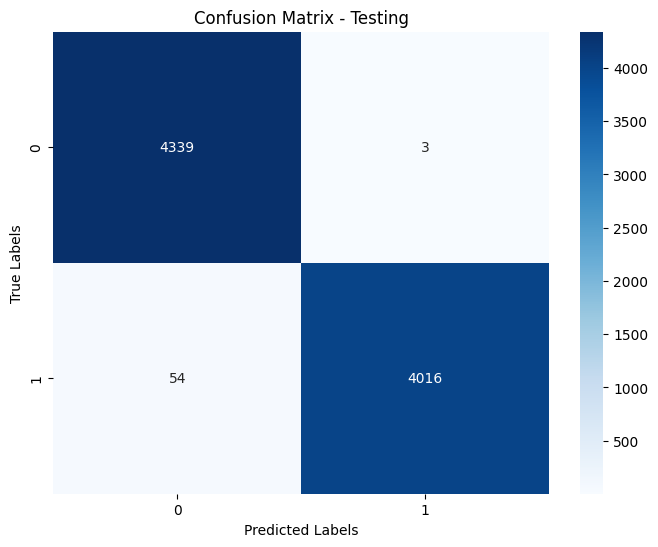

In [32]:
train_cm = confusion_matrix(test_true_labels, test_predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Testing")
plt.show()

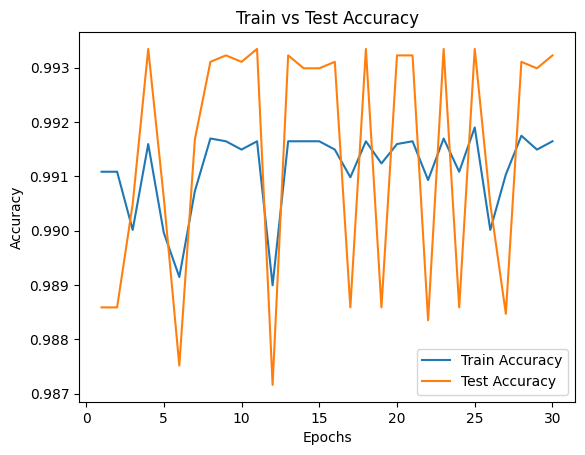

In [33]:
# Plot the train vs test accuracy graph
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, train_accuracy_values, label='Train Accuracy')
plt.plot(epochs_range, test_accuracy_values, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.legend()
plt.show()

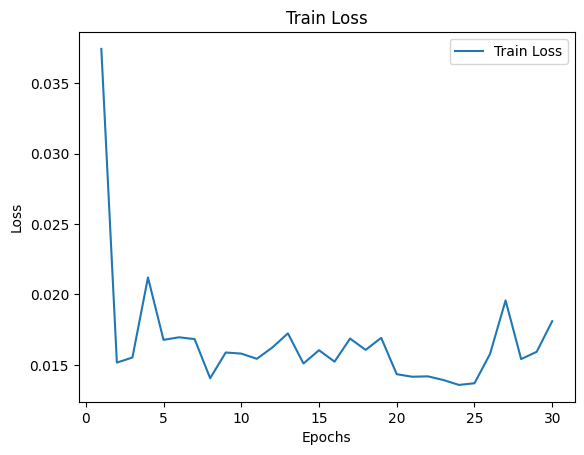

In [34]:

# Create epochs range
epochs_range = range(1, epochs + 1)

# Plot the loss graph
plt.plot(epochs_range, train_loss_values, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss')
plt.legend()
plt.show()
